# K-Means Clustering

We are going back to our old friend, the ***iris*** data set.


The main idea is: we start with $K$ random seeds ($centers$) and measure the $distance$ to each of the points, after which we move the center into the mean and reevaluate the distances. Naturally, we need to define a distance function.  A list of distance functions that scikit-learn's implementation of KMeans supports is here: http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.spatial.distance.cdist.html. You can also define your own distance functions.

Here is a demo of k-means clustering algorithm for 2D clusters:  http://shabal.in/visuals/kmeans/1.html

And here is an example of implementation in Python: https://datasciencelab.wordpress.com/2013/12/12/clustering-with-k-means-in-python/

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

With K-means, a lot depends on where clustering starts.  Solutions:

    cross-validation by mini-batching
    choosing multiple random cluster starting points
    kmeans++
    ...    

How kmeans++ works is here:  https://www.youtube.com/watch?v=BIQDlmZDuf8.

If we look at finding the optimal number of clusters as a likelihood-maximization probem, we can use **Information Criteria (*BIC* and / or *AIC*)** to estimate when we can stop increasing the number: if we are not adding new information by adding one more cluster, we are done.

This worksheet is focused on the K-means method.


In [46]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

Load the data set. Clustering belongs to unsupervised learning; so we are not going to need the labels ($iris.target$ is irrelevant; working only with $iris.data$), and we are not breaking the data into training and test sets.

In [47]:
# Load the data, which is included in sklearn.
iris = load_iris()
print('Iris feature names:', iris.feature_names)
X, Names = iris.data, iris.feature_names
print(X.shape)

# Shuffle the data, but make sure that the features and accompanying labels stay in sync.
np.random.seed(0)  #  To ensure repeatability of results
shuffle = np.random.permutation(np.arange(X.shape[0]))
X = X[shuffle]

Iris feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150, 4)


Let's explore each feature, to see if any grouping exists naturally in each of them.  We'll plot histograms, because boxplots are not sensitive to such groupings.

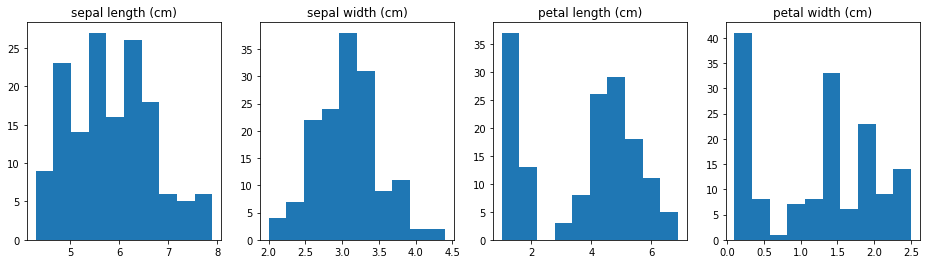

In [48]:
fig, axes = plt.subplots(nrows=1, ncols=4, sharex=False, sharey=False, figsize = (16, 4))

for ii in np.arange (0, X.shape[1]):
    ax = axes[ii]
    ax.hist(X[:,ii])
    ax.set_title(Names[ii])

plt.show()

Doesn't seem like much clustering going on there; let's use smaller bins:

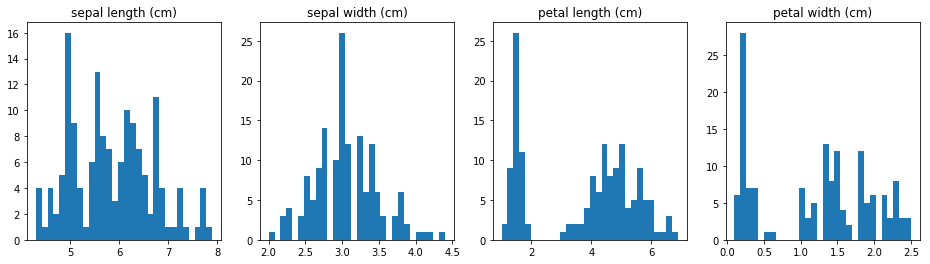

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=4, sharex=False, sharey=False, figsize = (16, 4))
for ii in np.arange (0, X.shape[1]):
    ax = axes[ii]
    ax.hist(X[:,ii], bins=30) ## We have 150 values for each feature; bins = 30 means we have 5 points per bin
    ax.set_title(Names[ii])

plt.show()

Much better!  Now we see more gaps between data distributions.  

As a side note, we could have used $bins = 50$, but that would only leave 3 points per bin - not enough for meaningful histograms.  The Freedman-Diaconis rule for computing the number of mins for a histogram is known to be very robust and work well in practice. The bin-width is set to $h=2∗IQR∗n^{(-1/3)} $. That makes the number of bins $(max-min)/h$.

We want a method to separate all data into normally-distributed groupings, fitting data points into K bell curves

In [50]:
#####################################
##  Let's see if we can apply the KMeans from scikit-learn to our data
km = KMeans (n_clusters=1, init='k-means++')
clstrs = km.fit (X)
print(clstrs.cluster_centers_.shape)
print(clstrs.cluster_centers_)


(1, 4)
[[5.84333333 3.054      3.75866667 1.19866667]]


This is a matrix, with coluns corresponding to each of the features and rows to each of the cluster centers.  Let's try a different number of centers:

In [51]:
km = KMeans (n_clusters=2, init='k-means++')
clstrs2 = km.fit (X)
print(clstrs2.cluster_centers_.shape)
print(clstrs2.cluster_centers_)

(2, 4)
[[6.30103093 2.88659794 4.95876289 1.69587629]
 [5.00566038 3.36037736 1.56226415 0.28867925]]


In [52]:
km = KMeans (n_clusters=5, init='k-means++')
clstrs5 = km.fit (X)
print(clstrs5.cluster_centers_.shape)
print(clstrs5.cluster_centers_)

(5, 4)
[[5.006      3.418      1.464      0.244     ]
 [6.52916667 3.05833333 5.50833333 2.1625    ]
 [7.475      3.125      6.3        2.05      ]
 [5.508      2.6        3.908      1.204     ]
 [6.20769231 2.85384615 4.74615385 1.56410256]]


Let's show the histograms of each of the features with the cluster centers at n_clusters = 3:


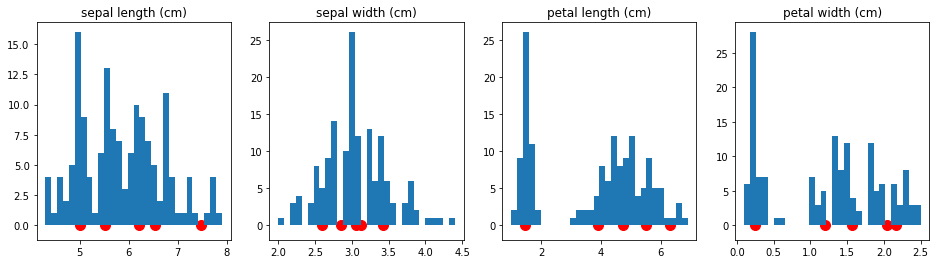

In [53]:
fig, axes = plt.subplots(nrows=1, ncols=4, sharex=False, sharey=False, figsize = (16, 4))
for ii in np.arange (0, X.shape[1]):
    ax = axes[ii]
    ax.hist(X[:,ii], bins=30) ## We have 150 values for each feature; bins = 30 means we have 5 points per bin
    ax.scatter (x = clstrs5.cluster_centers_[:,ii], y = np.zeros(5), c = 'red', s = 100)
    ax.set_title(Names[ii])

plt.show()

Here the big red circles correspond to cluster centers.  We see that sepal length and petal length may be viewed as having 5 clusters (though most likely sepal length is really only 4), but sepal width is most likely one big cluster, and petal width really only has 4 clusters.

Let's wrap it into a function and check the histograms for several cluster counts

Number of Clusters: 1


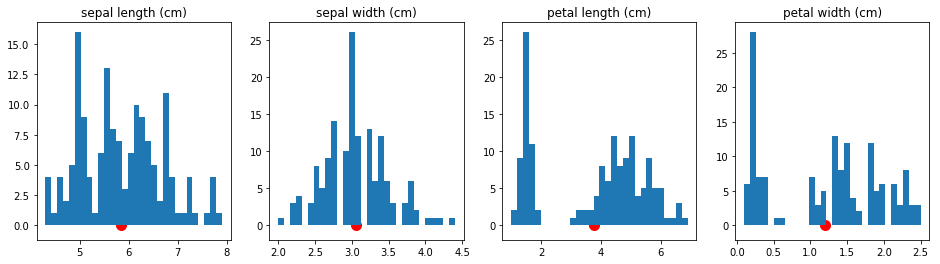

[[5.84333333 3.054      3.75866667 1.19866667]]
Number of Clusters: 2


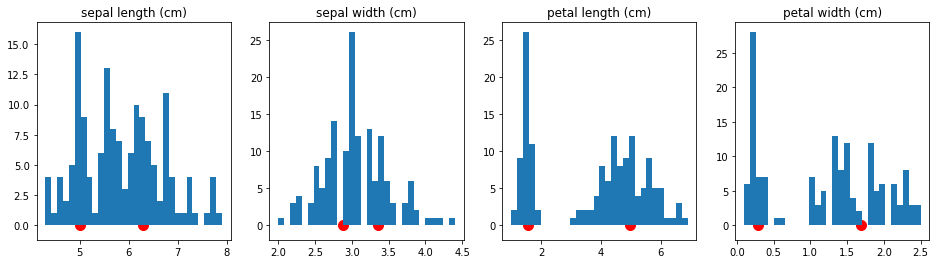

[[6.30103093 2.88659794 4.95876289 1.69587629]
 [5.00566038 3.36037736 1.56226415 0.28867925]]
Number of Clusters: 3


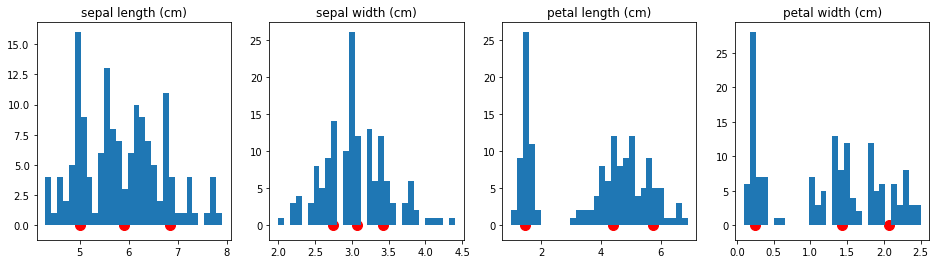

[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]
Number of Clusters: 5


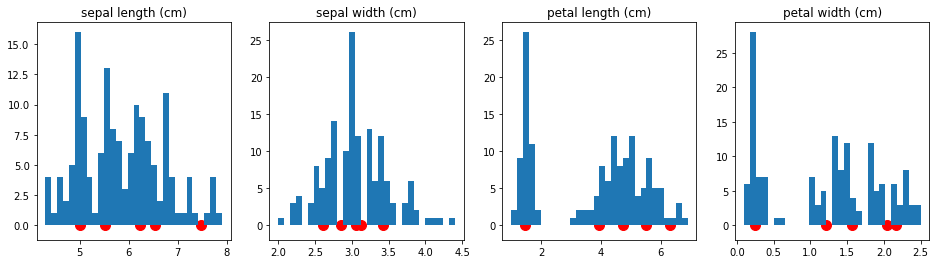

[[5.006      3.418      1.464      0.244     ]
 [6.52916667 3.05833333 5.50833333 2.1625    ]
 [6.22105263 2.85526316 4.75263158 1.57105263]
 [5.51538462 2.60769231 3.93076923 1.20769231]
 [7.475      3.125      6.3        2.05      ]]


In [54]:
def ApplyKMeans (N, X = X, show_hist_and_centers = True):
    
    print("Number of Clusters: %d" % (N))
    km = KMeans (n_clusters=N, init='k-means++')
    clstrs = km.fit (X)
    
    fig, axes = plt.subplots(nrows=1, ncols=4, sharex=False, sharey=False, figsize = (16, 4))
    for ii in np.arange (0, X.shape[1]):
        ax = axes[ii]
        ax.hist(X[:,ii], bins=30) ## We have 150 values for each feature; bins = 30 means we have 5 points per bin
        ax.scatter (x = clstrs.cluster_centers_[:,ii], y = np.zeros(N), c = 'red', s = 100)
        ax.set_title(Names[ii])

    plt.show()

    print(clstrs.cluster_centers_)

    return clstrs

#for nn in [1,2,3,4,5,6,7,8,9,10]:
for nn in [1,2, 3, 5]:
    clstrs = ApplyKMeans(nn)
    


We see that $ < 3$ clusters is too few, and $>= 5$ is too many. How can we decide what is the good number of clusters?

**One way to do that is to count the local maxima in the density plot.  A density plot is basically a continuous line conecting the peaks of the histogram bars.**

In python, plotting a density line is not as obvious as in R, but can be done.

More details here: http://stackoverflow.com/questions/4150171/how-to-create-a-density-plot-in-matplotlib
"gaussian_kde uses a changable function, covariance_factor to calculate it's bandwidth. Before changing the function, the value returned by covariance_factor for this data was about .5. Lowering this lowered the bandwidth. I had to call _compute_covariance after changing that function so that all of the factors would be calculated correctly. It isn't an exact correspondence with the bw parameter from R, but hopefully it helps you get in the right direction."

For more details on Gaussian KDE (kernel density estimator), see, e.g., here: https://en.wikipedia.org/wiki/Kernel_density_estimation and for its python implementation, here: http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.gaussian_kde.html

In [55]:
from scipy.stats import gaussian_kde
def DrawDensityPlot(myVector, Name, ax, covar_factor = 0.1):
    data = myVector
    density = gaussian_kde(data)
    minData = min(data)
    maxData = max (data)
    sizeOfData = len(data)
    xs = np.linspace(minData,maxData,sizeOfData)
    density.covariance_factor = lambda : covar_factor
    density._compute_covariance()
    ax.plot(xs,density(xs))
    ax.set_title(Name)
    return ax

---------------------------------
Number of Clusters: 2


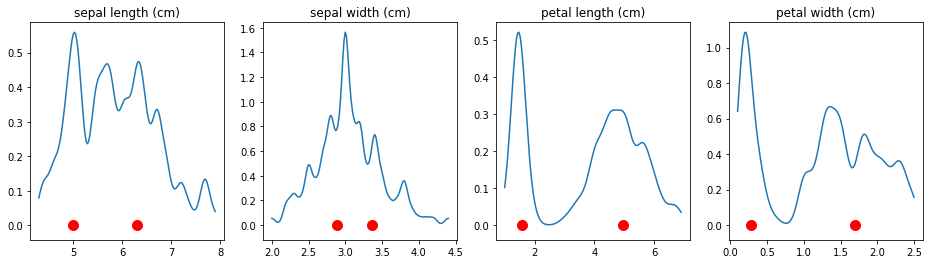

[[6.30103093 2.88659794 4.95876289 1.69587629]
 [5.00566038 3.36037736 1.56226415 0.28867925]]
---------------------------------
Number of Clusters: 3


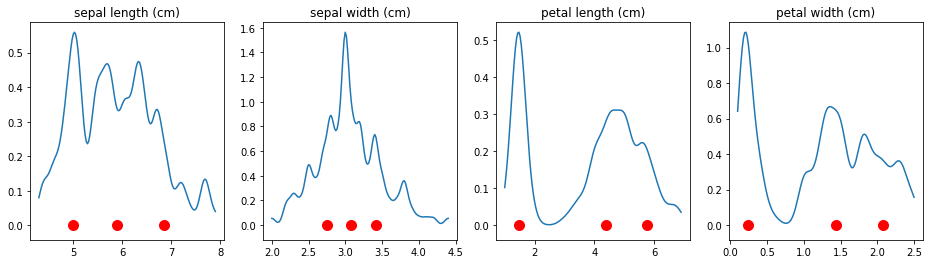

[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]
---------------------------------
Number of Clusters: 4


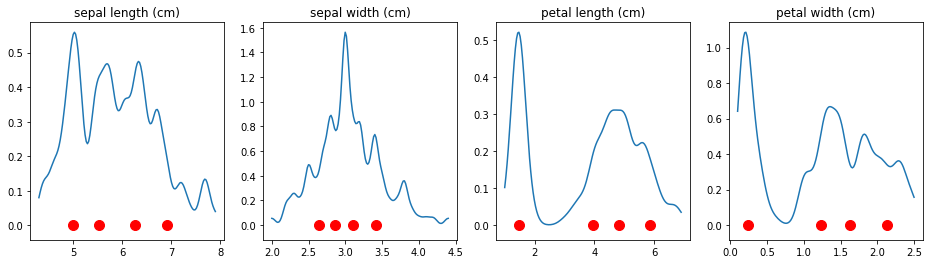

[[5.53214286 2.63571429 3.96071429 1.22857143]
 [5.006      3.418      1.464      0.244     ]
 [6.9125     3.1        5.846875   2.13125   ]
 [6.2525     2.855      4.815      1.625     ]]
---------------------------------
Number of Clusters: 5


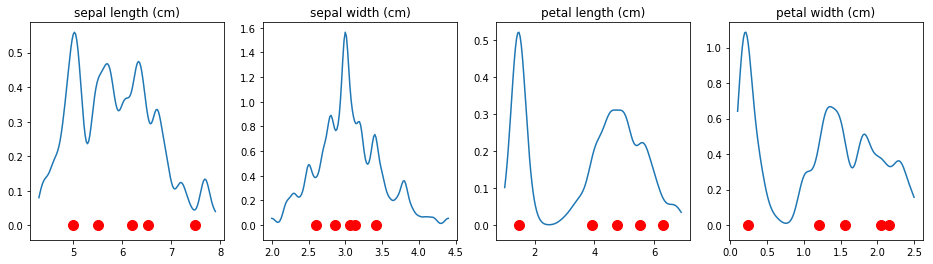

[[6.20769231 2.85384615 4.74615385 1.56410256]
 [5.006      3.418      1.464      0.244     ]
 [6.52916667 3.05833333 5.50833333 2.1625    ]
 [5.508      2.6        3.908      1.204     ]
 [7.475      3.125      6.3        2.05      ]]


In [56]:
##  Use the ShowDensityPlot function:

def ApplyKMeansShowDensity (N, X = X, show_hist_and_centers = True, kde_covar_factor = 0.1):
    
    print("---------------------------------")
    print("Number of Clusters: %d" % (N))
    km = KMeans (n_clusters=N, init='k-means++')
    clstrs = km.fit (X)
    
    fig, axes = plt.subplots(nrows=1, ncols=4, sharex=False, sharey=False, figsize = (16, 4))
    for ii in np.arange (0, X.shape[1]):
        ax = axes[ii]
        ax = DrawDensityPlot(myVector = X[:,ii], Name = Names[ii], ax = ax, covar_factor = kde_covar_factor)
        ax.scatter (x = clstrs.cluster_centers_[:,ii], y = np.zeros(N), c = 'red', s = 100)

    plt.show()

    print(clstrs.cluster_centers_)

    return clstrs

#for nn in [1,2,3,4,5,6,7,8,9,10]:
for nn in [2,3,4,5]:  ##  Single cluster is an exercise in futility, and we already know that >=5 clusters is already too many
    clstrs = ApplyKMeansShowDensity(nn, kde_covar_factor =0.1125)
    

In other words, if we have a way to get the number of local maxima of the PDF (probability density function), then we have a way to tell KMeans how many clusters to look for in the data.

If we already know the local PDF maxima, why use KMeans at all?  We can slide down the peaks of the PDFs until we reach the corresponding local minima (**"cluster expansion process"**).  This is known as the **Model-Based Clustering** method.  It is very powerful; if we assume clusters to be hyperspherical, guesswork is eliminated. It also goes over multiple cluster shapes and optimizes the ***BIC*** by varying the shape and the number of clusters.  Its only downside is its low computational efficiency compared with KMeans and hierarchical clustering.  We will cover it later.  Here is a paper outlining the method:  http://www.jstatsoft.org/v18/i06/paper.  An implementation exists in python's ***sklearn.mixture*** library.  A better version is implemented in **R** (package ***mclust***).  You can invoke any R code from python directly by using the ***rpy2*** library.  

Back to our data.  There are a number of methods to figure out the number of clusters that "makes sense".  See, e.g., here: https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set.  

If we look at finding the optimal number of clusters as a likelihood-maximization probem, we can use **Information Criteria (*BIC* and *AIC*)** to estimate when we can stop increasing the number: if we are not adding new information by adding one more cluster, we are done.  This method is also known as ***X-means***. The paper introducing it is here:  http://www.cs.cmu.edu/~dpelleg/download/xmeans.pdf

We take advantage of the fact that k-means is asymptotically Gaussian: for a Gaussian distribution, $likelihood = \prod_k (centeredSumOfSquares_w * centeredSumOfSquares_b)$, where $centeredSumOfSquares_w$ is sum of squares of distances from the points to the centers of the clusters, and $centeredSumOfSquares_w$ is the sum of pairwise squares of distances between the centers of the clusters.  In K-means, distances to centers are represented by the inertia_ attribute.  Distances between cluster centers can be computed directly, e.g., as described here: https://machinelearning1.wordpress.com/2013/04/10/calculating-spatial-distance-metric-in-python/.

In [57]:
from scipy.spatial import distance

def computeBIC (clstrs, X):
    n = X.shape[1]
    m = X.shape[0]
    k = len(clstrs.cluster_centers_)
    Dw = np.power(clstrs.inertia_, 2)
    Db = 0
    for cc0 in range(k):
        for cc1 in range(k):
            if not cc0 == cc1:
                Db = Db + distance.euclidean (clstrs.cluster_centers_[cc0], clstrs.cluster_centers_[cc1])
    ##print "Dw = %.3f; Db = %.3f" %(Dw,Db)
    D = np.sqrt (Dw + np.power(Db, 2))
    BIC = D + np.log(n)*m*k
    AIC = D + 2*m*k    
    return BIC, AIC

    
    
for ff in np.arange (X.shape[1]):

    myX = X[:,ff].reshape (len (X[:,ff]), 1)
    print("Feature: %s" % (Names[ff]))
    # print myX.shape
    
    for nn in range (1,6):
        km = KMeans (n_clusters=nn, init='k-means++')
        clstrs = km.fit (myX)
        bic, aic = computeBIC(clstrs, myX)
        print("Feature: %s. Number of clusters = %d.  BIC = %.3f. AIC = %.3f" % (Names[ff], nn, bic, aic))



Feature: sepal length (cm)
Feature: sepal length (cm). Number of clusters = 1.  BIC = 102.168. AIC = 402.168
Feature: sepal length (cm). Number of clusters = 2.  BIC = 31.039. AIC = 631.039
Feature: sepal length (cm). Number of clusters = 3.  BIC = 17.782. AIC = 917.782
Feature: sepal length (cm). Number of clusters = 4.  BIC = 18.797. AIC = 1218.797
Feature: sepal length (cm). Number of clusters = 5.  BIC = 26.219. AIC = 1526.219
Feature: sepal width (cm)
Feature: sepal width (cm). Number of clusters = 1.  BIC = 28.013. AIC = 328.013
Feature: sepal width (cm). Number of clusters = 2.  BIC = 11.259. AIC = 611.259
Feature: sepal width (cm). Number of clusters = 3.  BIC = 6.978. AIC = 906.978
Feature: sepal width (cm). Number of clusters = 4.  BIC = 9.853. AIC = 1209.853
Feature: sepal width (cm). Number of clusters = 5.  BIC = 14.905. AIC = 1514.905
Feature: petal length (cm)
Feature: petal length (cm). Number of clusters = 1.  BIC = 463.864. AIC = 763.864
Feature: petal length (cm). Nu

We see that AIC is more conservative:

    Sepal Length:  BIC: 3  AIC: 1
    Sepal Width:   BIC: 3  AIC: 1
    Petal Length:  BIC: 3  AIC: 2
    Petal Width:   BIC: 3  AIC: 1
    
We also know that there are 3 classes (labels) in the iris the data set, and BIC has returned 3 clusters for each feature. It makes sense to use BIC, rather than AIC, for getting the optimal number of clusters.
    
    
Reproduce the histograms here again:

Number of Clusters: 1


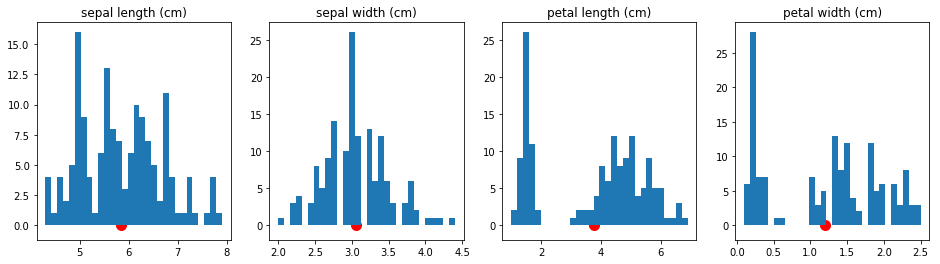

[[5.84333333 3.054      3.75866667 1.19866667]]
Number of Clusters: 2


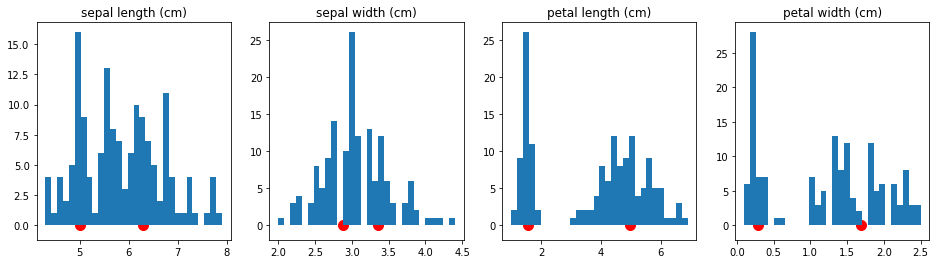

[[6.30103093 2.88659794 4.95876289 1.69587629]
 [5.00566038 3.36037736 1.56226415 0.28867925]]
Number of Clusters: 3


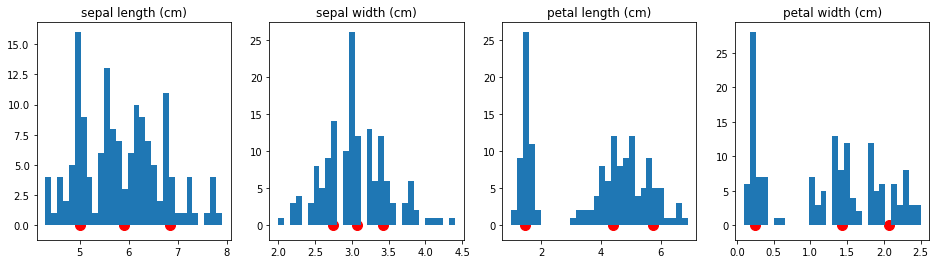

[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]
Number of Clusters: 4


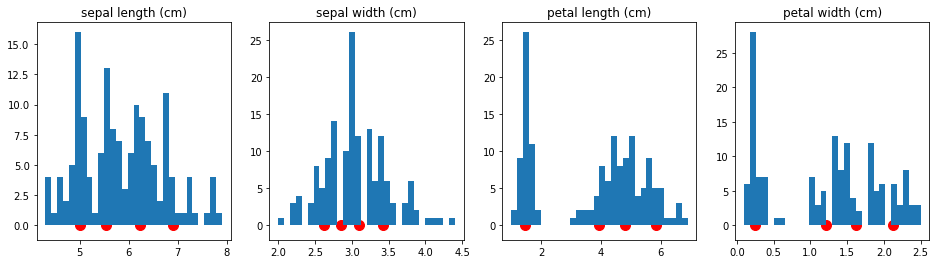

[[5.52962963 2.62222222 3.94074074 1.21851852]
 [5.006      3.418      1.464      0.244     ]
 [6.9125     3.1        5.846875   2.13125   ]
 [6.23658537 2.85853659 4.80731707 1.62195122]]
Number of Clusters: 5


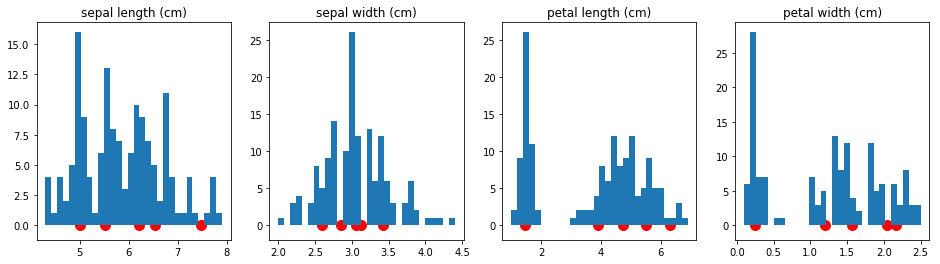

[[7.475      3.125      6.3        2.05      ]
 [5.006      3.418      1.464      0.244     ]
 [6.52916667 3.05833333 5.50833333 2.1625    ]
 [5.508      2.6        3.908      1.204     ]
 [6.20769231 2.85384615 4.74615385 1.56410256]]


In [58]:
for nn in [1,2,3,4,5]:
    clstrs = ApplyKMeans(nn)
    

We see that, while AIC is good at detecting true positives (Petal Length), it rejected too many false negatives (all other features of X).  On the other hand, BIC has separated the data into 3 clusters by each of the 4 features. 

Now let's look at some 2D combinations of features, just to help us visualize the data.  It is easy enough to generalize to any number of features.

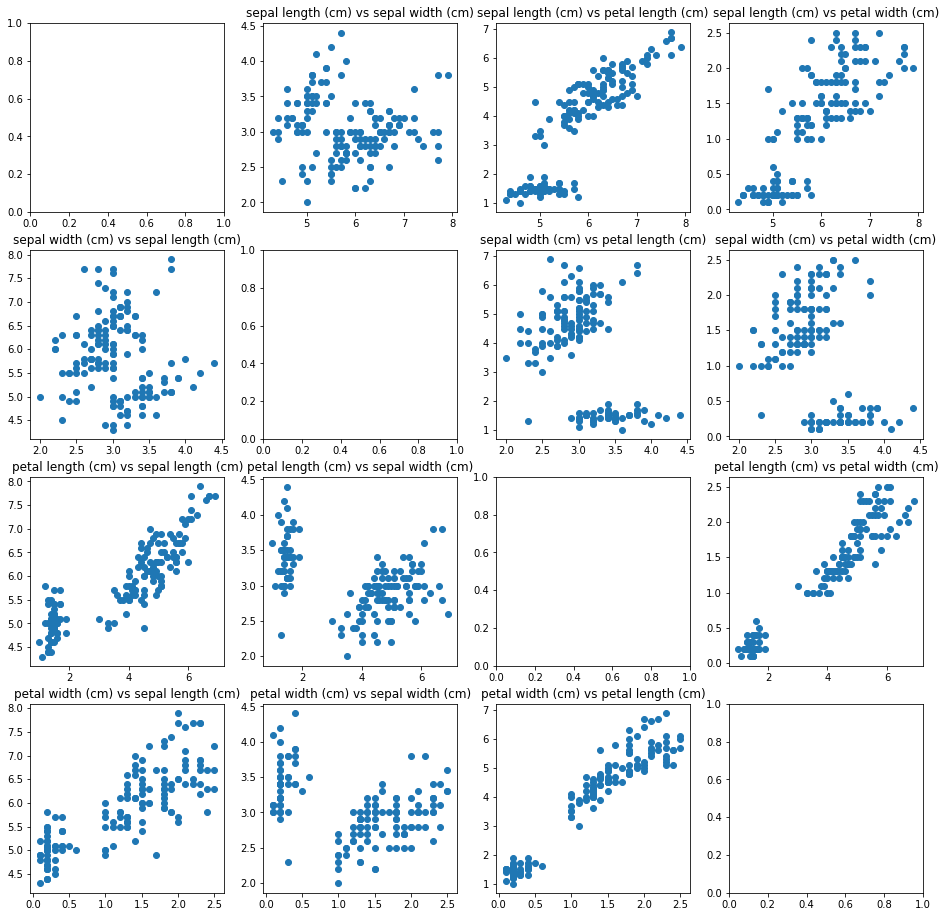

In [59]:
fig, axes = plt.subplots(nrows=X.shape[1], ncols=X.shape[1], sharex=False, sharey=False, figsize = (16, 16))


for f1 in np.arange (X.shape[1]):
    for f2 in np.arange (X.shape[1]):
       if not f1 == f2:
            ax = axes[f1, f2]
            ax.scatter (X[:,f1], X[:,f2])
            ax.set_title (Names[f1] + " vs " + Names[f2])
            
plt.show()

(1, 2)
[[5.84333333 3.054     ]]
BIC = 430.181
['r']


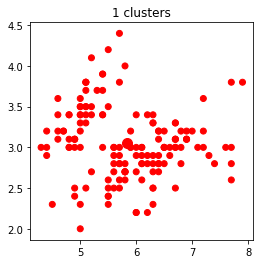

(2, 2)
[[6.61044776 2.96567164]
 [5.22409639 3.1253012 ]]
BIC = 658.050
['r' 'g']


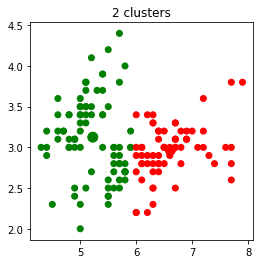

(3, 2)
[[5.006      3.418     ]
 [6.81276596 3.07446809]
 [5.77358491 2.69245283]]
BIC = 937.977
['r' 'g' 'b']


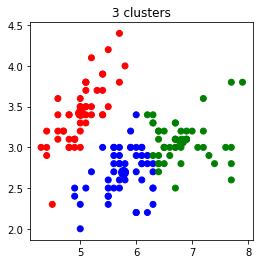

(4, 2)
[[5.90980392 2.73529412]
 [5.19677419 3.63870968]
 [6.85348837 3.1       ]
 [4.772      2.9       ]]
BIC = 1232.214
['r' 'g' 'b' 'm']


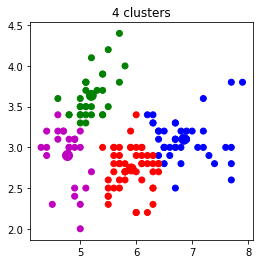

(5, 2)
[[6.54615385 3.04615385]
 [5.19677419 3.63870968]
 [5.83953488 2.70930233]
 [7.475      3.125     ]
 [4.772      2.9       ]]
BIC = 1536.217
['r' 'g' 'b' 'm' 'c']


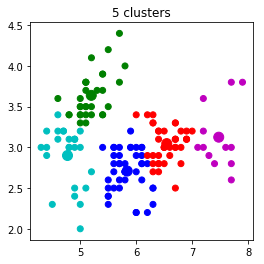

In [60]:
Xpair = X[:,(0,1)]

def Get2DClusters (Xpair, N):
    km = KMeans (n_clusters=N, init='k-means++')
    clstrs = km.fit (Xpair)
    print(clstrs.cluster_centers_.shape)
    print(clstrs.cluster_centers_)
    aic, bic = computeBIC(clstrs, Xpair)
    print('BIC = %.3f' %(bic))
    
    myColors = ('red', 'green', 'blue', 'magenta', 'cyan', 'k', '0.2', '0.4')
    if N > 8:
        return clstrs
    
    myClCols = np.empty(Xpair.shape[0], 'str')
    for ii in np.arange (0, len(clstrs.labels_)):
        color_index = clstrs.labels_[ii]
        myClCols[ii] = myColors[color_index]

    plt.figure(figsize = (4, 4))
    plt.scatter (Xpair[:,0], Xpair[:,1], c = myClCols)

    myCntrCol = np.empty(N, 'str')
    for ii in np.arange (0, N):
        color_index = ii
        myCntrCol[ii] = myColors[color_index]

    print(myCntrCol)
    plt.scatter (clstrs.cluster_centers_[:,0], clstrs.cluster_centers_[:,1], c = myCntrCol, s = 100)
    plt.title (str(N) + " clusters")
    plt.show()
    return clstrs

##  Compute the "right" number of clusters:

for nn in range (1, 6):
    myClstrs = Get2DClusters(Xpair, N = nn)


$k = 3$ gives an adequate good split, and we know from the $BIC$ analysis of features that it is the optimal cluster number. Note that for 2D clustering, BIC fails to call 3 as the optimal cluster number.  It may be an indication of:

    Independence of the 2 chosen features
    Within-cluster joint probability distribution of the 2 features being too wide.
    
Further analysis is needed, including BIC analysis with all 4 features.

Other methods may work better than the BIC.  
For example, percentage of variance explained by the clustering (similar to R-Squared) as a function of number of clusters is often used in cluster analysis.

# Conclusions:

We have demonstrated the use of KMeans in clustering multi-dimensional data.  The same principles will apply to any number of dimensions.  Note that the complexity of K-means algorithm is $O(K * n)$ ($n$ is number of observations in the data set)

The Euclidean distance - which is what KMeans is designed for - ensures that clustering works the way it does.  KMeans is the simplest clustering method, yet very often it is sufficient.  Like with vector clustering, care must be taken to ensure that we are not overfitting (not splitting the data into more clusters than we really need.

Note that the obvious "DMZ" band between the data points is practically ignored by KMeans at $k = 2$, placing one centroid  right into it.  It is something to be aware of.  SVM would have been more useful in this case.

We discussed some ways to improve clustering reproducibility and to figure out the optimal cluster count.

We also mentioned the model-based clustering and outlined in general how it works.

Yet another clustering method is *** Density-based scanning*** (***DBSCAN***). You can find its description here:  https://en.wikipedia.org/wiki/DBSCAN.  Its python implementation is here: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html and here: http://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html